In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))


Epoch 1/10
235/235 [==============================] - 1s 2ms/step - loss: 0.6995 - val_loss: 0.6992
Epoch 2/10
235/235 [==============================] - 1s 2ms/step - loss: 0.6991 - val_loss: 0.6989
Epoch 3/10
235/235 [==============================] - 1s 2ms/step - loss: 0.6988 - val_loss: 0.6986
Epoch 4/10
235/235 [==============================] - 1s 2ms/step - loss: 0.6985 - val_loss: 0.6983
Epoch 5/10
235/235 [==============================] - 1s 2ms/step - loss: 0.6982 - val_loss: 0.6980
Epoch 6/10
235/235 [==============================] - 1s 2ms/step - loss: 0.6979 - val_loss: 0.6977
Epoch 7/10
235/235 [==============================] - 1s 2ms/step - loss: 0.6976 - val_loss: 0.6974
Epoch 8/10
235/235 [==============================] - 1s 2ms/step - loss: 0.6974 - val_loss: 0.6972
Epoch 9/10
235/235 [==============================] - 1s 2ms/step - loss: 0.6971 - val_loss: 0.6969
Epoch 10/10
235/235 [==============================] - 1s 2ms/step - loss: 0.6968 - val_loss: 0.6966

313/313 [==============================] - 0s 306us/step


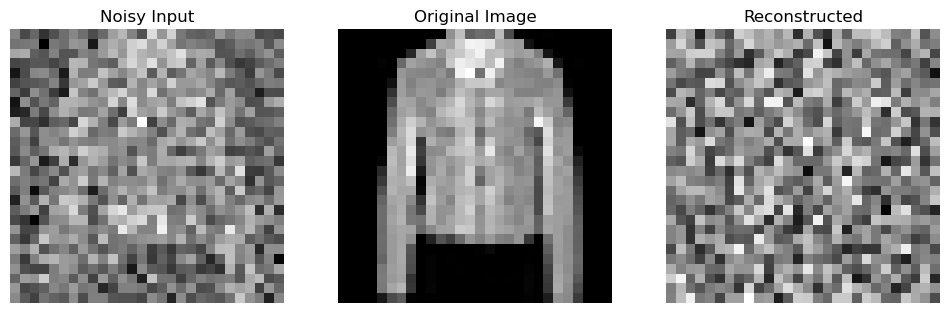

In [2]:
import matplotlib.pyplot as plt

# Use the autoencoder to predict the noisy test set
decoded_imgs = autoencoder.predict(x_test_noisy)

# Select an image to visualize
n = 10  # For example, the 10th image in the test set

# Plotting
plt.figure(figsize=(12, 6))

# Display the noisy input image
plt.subplot(1, 3, 1)
plt.imshow(x_test_noisy[n].reshape(28, 28), cmap='gray')
plt.title('Noisy Input')
plt.axis('off')

# Display the original image (for comparison)
plt.subplot(1, 3, 2)
plt.imshow(x_test[n].reshape(28, 28), cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display the reconstructed image
plt.subplot(1, 3, 3)
plt.imshow(decoded_imgs[n].reshape(28, 28), cmap='gray')
plt.title('Reconstructed')
plt.axis('off')

plt.show()


Epoch 1/10
235/235 [==============================] - 1s 2ms/step - loss: 0.6963 - val_loss: 0.6962
Epoch 2/10
235/235 [==============================] - 1s 2ms/step - loss: 0.6960 - val_loss: 0.6959
Epoch 3/10
235/235 [==============================] - 1s 2ms/step - loss: 0.6958 - val_loss: 0.6956
Epoch 4/10
235/235 [==============================] - 1s 2ms/step - loss: 0.6955 - val_loss: 0.6954
Epoch 5/10
235/235 [==============================] - 1s 2ms/step - loss: 0.6953 - val_loss: 0.6951
Epoch 6/10
235/235 [==============================] - 1s 2ms/step - loss: 0.6950 - val_loss: 0.6949
Epoch 7/10
235/235 [==============================] - 1s 2ms/step - loss: 0.6948 - val_loss: 0.6947
Epoch 8/10
235/235 [==============================] - 1s 2ms/step - loss: 0.6946 - val_loss: 0.6944
Epoch 9/10
235/235 [==============================] - 1s 2ms/step - loss: 0.6943 - val_loss: 0.6942
Epoch 10/10
235/235 [==============================] - 1s 2ms/step - loss: 0.6941 - val_loss: 0.6940

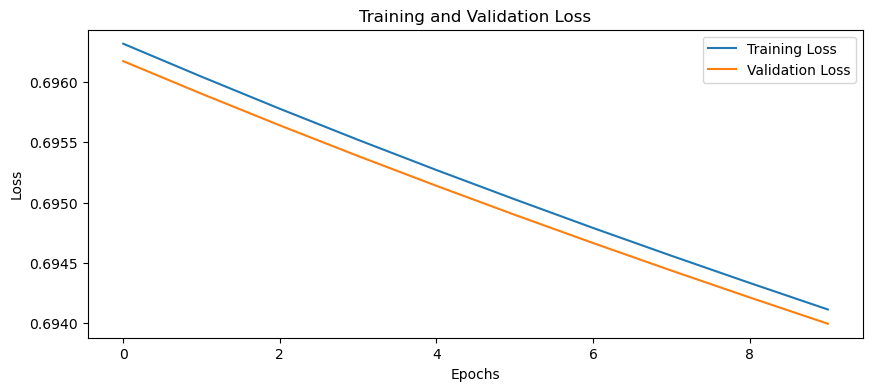

In [3]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Define the autoencoder structure
input_img = Input(shape=(784,))
encoding_dim = 32
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Load and preprocess the data
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Introduce noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Train the model
history = autoencoder.fit(x_train_noisy, x_train,
                          epochs=10,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test))

# Plot the training and validation loss
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
